In [1]:
!pip install bioinfokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.0/87.0 KB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.0-py3-none-any.whl size=58662 sha256=16ed2ade8660a81410d059721e2b7161f3bd9be6b555f12f599d3e724023be31
  Stored in directory: /root/.cache/pip/wheels/93/5b/a8/2be2669621c3c344d362eb6703e5fd7b6ece47a6b5ab35b207
Successfully built bioinfokit


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import bioinfokit as bio
import seaborn as sns

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics
import plotly.express as px
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [3]:
df=pd.read_csv("/content/mcdonalds.csv")

In [4]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
df.shape

(1453, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [9]:
df.nunique()

yummy              2
convenient         2
spicy              2
fattening          2
greasy             2
fast               2
cheap              2
tasty              2
expensive          2
healthy            2
disgusting         2
Like              11
Age               54
VisitFrequency     6
Gender             2
dtype: int64

In [11]:
df.describe(include="all")

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453.000000,1453,1453
unique,2,2,2,2,2,2,2,2,2,2,2,11,NaN,6,2
top,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+3,NaN,Once a month,Female
freq,803,1319,1317,1260,765,1308,870,936,933,1164,1100,229,NaN,439,788
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.604955,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.221178,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,NaN,NaN


In [12]:
df.columns.values

array(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast',
       'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like',
       'Age', 'VisitFrequency', 'Gender'], dtype=object)

In [13]:
df.isna().sum()
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [15]:
df['yummy'].value_counts()

Yes    803
No     650
Name: yummy, dtype: int64

In [16]:
df['convenient'].value_counts()

Yes    1319
No      134
Name: convenient, dtype: int64

In [17]:
df['fattening'].value_counts()

Yes    1260
No      193
Name: fattening, dtype: int64

In [18]:
df['fast'].value_counts()

Yes    1308
No      145
Name: fast, dtype: int64

In [19]:
df['tasty'].value_counts()

Yes    936
No     517
Name: tasty, dtype: int64

In [20]:
df['expensive'].value_counts()

No     933
Yes    520
Name: expensive, dtype: int64

In [21]:
df['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [22]:
df["yummy"]= df["yummy"].replace({'Yes':1, 'No':0})
df["convenient"] = df["convenient"].replace({'Yes':1, 'No':0})
df["spicy"] = df["spicy"].replace({'Yes':1, 'No':0})
df["fattening"] = df["fattening"].replace({'Yes':1, 'No':0})
df["greasy"] = df["greasy"].replace({'Yes':1, 'No':0})
df["fast"] = df["fast"].replace({'Yes':1, 'No':0})
df["cheap"] = df["cheap"].replace({'Yes':1, 'No':0})
df["tasty"] = df["tasty"].replace({'Yes':1, 'No':0})
df["expensive"] = df["expensive"].replace({'Yes':1, 'No':0})
df["healthy"] = df["healthy"].replace({'Yes':1, 'No':0})
df["disgusting"] = df["disgusting"].replace({'Yes':1, 'No':0})


In [23]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [24]:
df1=df.iloc[:,0:11]

In [25]:
df1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


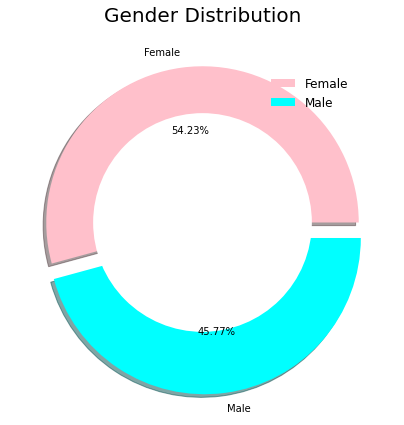

In [27]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['pink', 'cyan']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')

plt.title('Gender Distribution', fontsize = 20)
plt.subplots_adjust(top=1.2)

plt.axis('off')

plt.gca().set_aspect('equal')
plt.gca().set_facecolor('white')
plt.gca().add_artist(plt.Circle((0,0),0.7,fc='white'))
plt.rcParams['text.color'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.gca().set_axisbelow(True)

legend_labels = ['Female', 'Male']
plt.legend(labels=legend_labels, loc='upper right', bbox_to_anchor=(0.9, 0.9), frameon=False, prop={'size': 12})

plt.show()

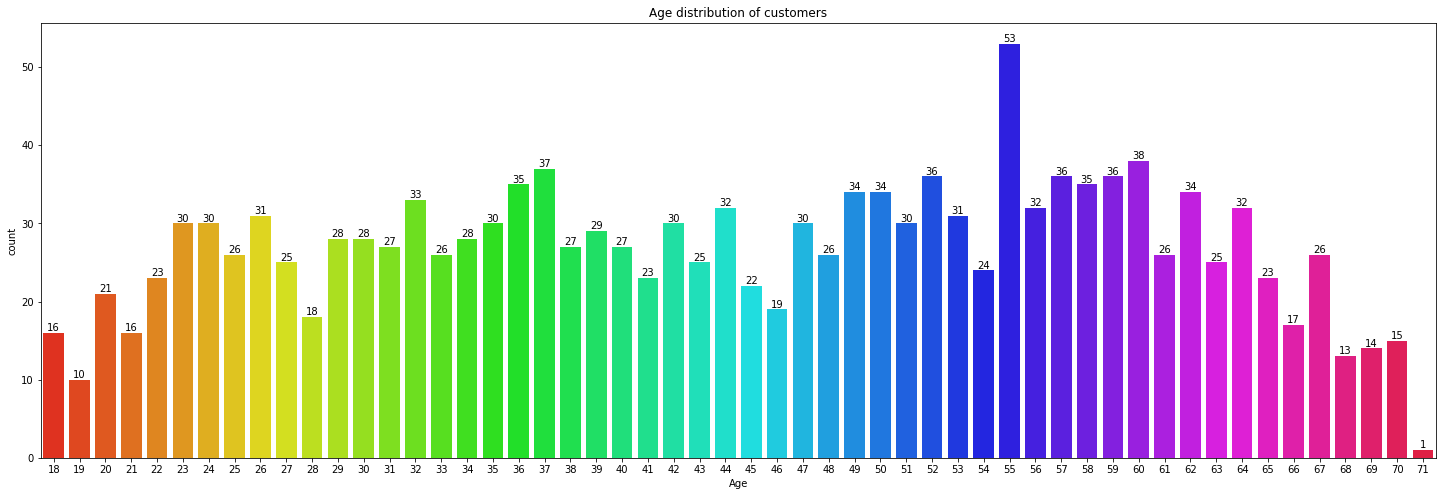

In [28]:
plt.rcParams['figure.figsize'] = (25, 8)
f = sns.countplot(x=df['Age'],palette = 'hsv')
f.bar_label(f.containers[0])
plt.title('Age distribution of customers')
plt.show()

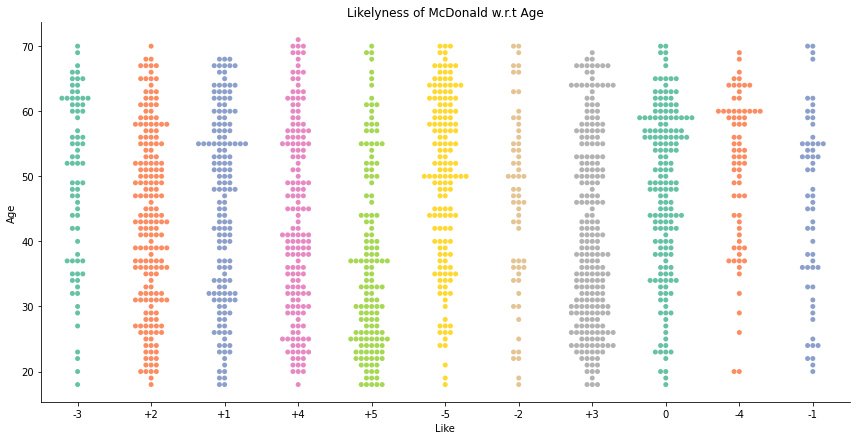

In [30]:
df['Like']= df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
sns.catplot(x="Like", y="Age",data=df, 
            orient="v", height=6, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age')
plt.show()

In [31]:
from sklearn.preprocessing import LabelEncoder
def labelling(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


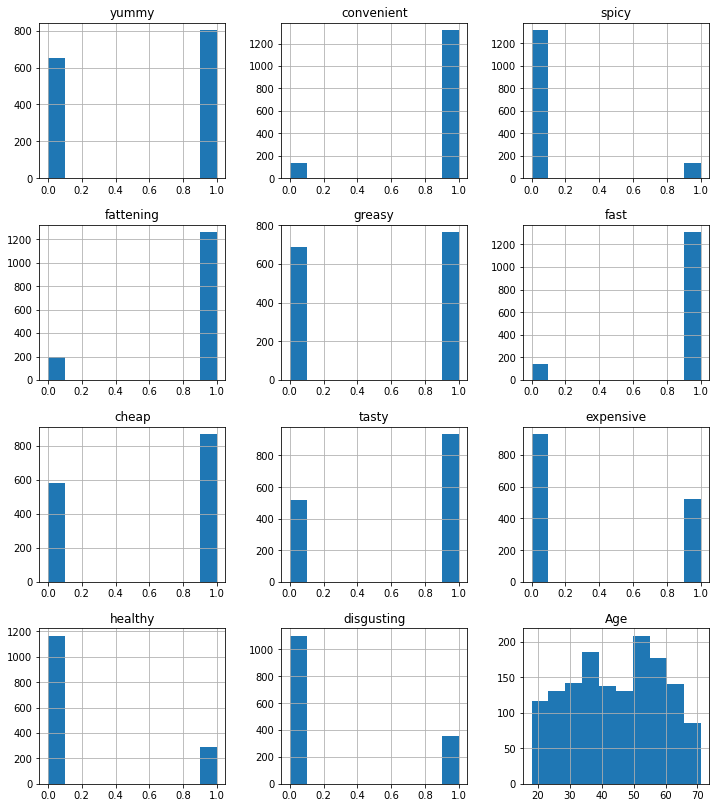

In [32]:
plt.rcParams['figure.figsize'] = (12,14)
df.hist()
plt.show()

In [33]:
mcd_eleven = df.loc[:,cat]
mcd_eleven

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [34]:
x = df.loc[:,cat].values
x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [35]:
from sklearn import preprocessing
pca_data = preprocessing.scale(x)

pca = PCA(n_components=11)
pc = pca.fit_transform(x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [36]:
pca.explained_variance_ratio_

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [37]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

In [38]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = mcd_eleven.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning:

Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


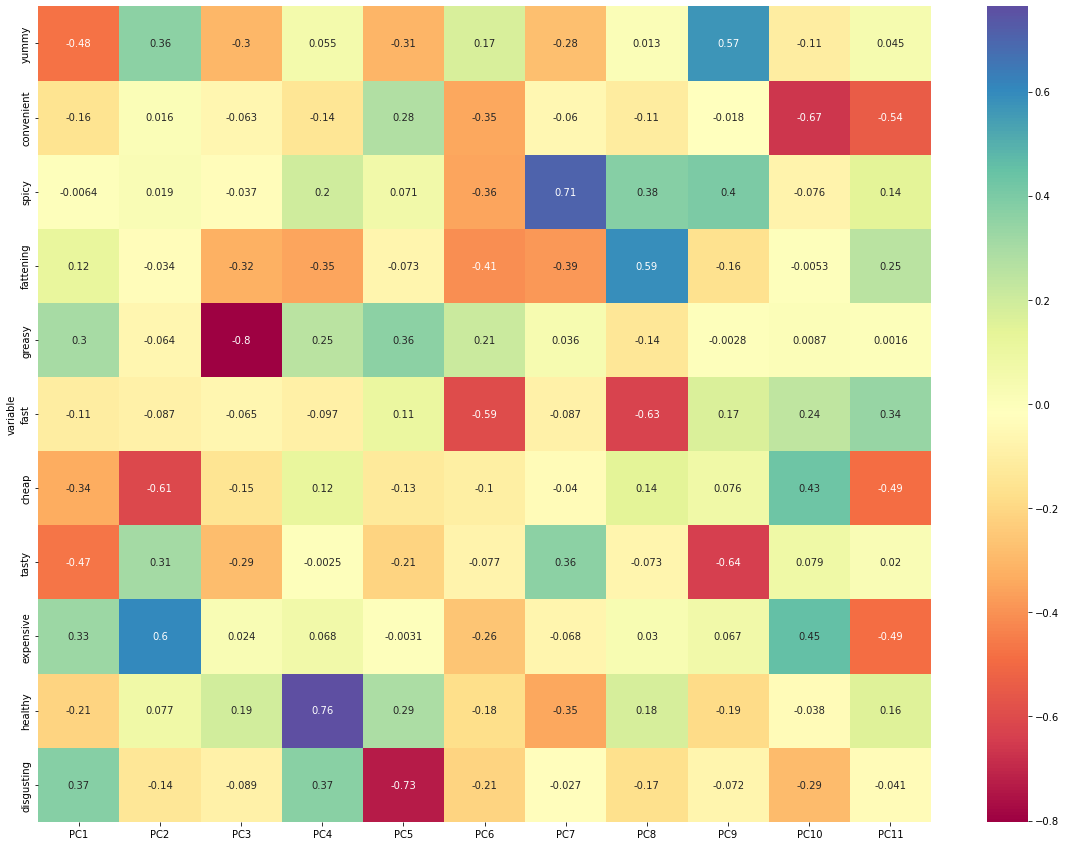

In [39]:
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

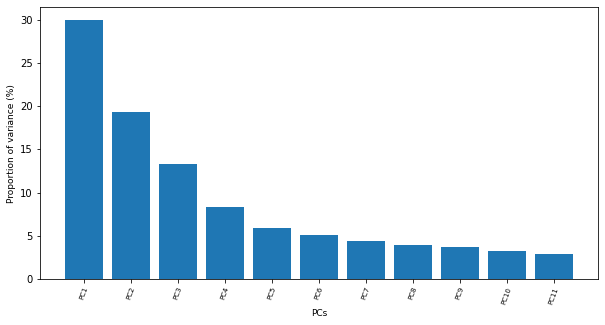

In [40]:
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))

In [43]:
std_dev = []
for i in names:
    std_dev.append(np.std(pf[i]))
    
print("Standard Deviation")
np.array(std_dev)

Standard Deviation


array([0.75678896, 0.60724649, 0.50444578, 0.39866134, 0.33728888,
       0.31016782, 0.28959761, 0.27502727, 0.2651598 , 0.24875617,
       0.23682131])

In [44]:
cp = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Proportion")
cp

Cumulative Proportion


array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

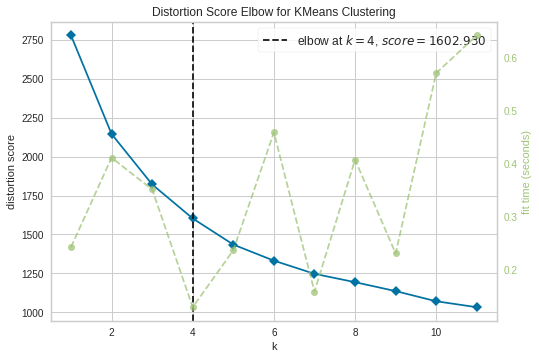

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(mcd_eleven)
visualizer.show()

In [46]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(mcd_eleven)
df['cluster_num'] = kmeans.labels_
print (kmeans.labels_) 
print (kmeans.inertia_)  
print(kmeans.n_iter_) 
print(kmeans.cluster_centers_)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



[2 0 0 ... 0 1 3]
1603.0604440558923
7
[[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]


In [47]:
from collections import Counter
Counter(kmeans.labels_)

Counter({2: 304, 0: 323, 1: 580, 3: 246})

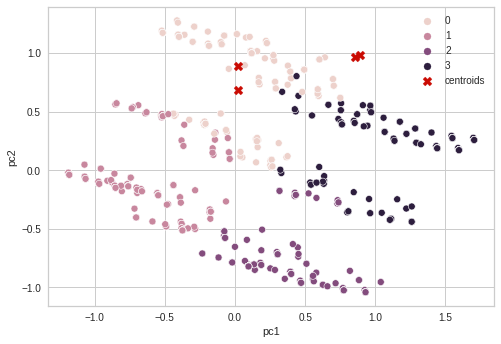

In [48]:
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [49]:
mcd_data2=pd.get_dummies(df, prefix=['cluster_num'], columns=['cluster_num'])
mcd_data2.head(4)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num_0,cluster_num_1,cluster_num_2,cluster_num_3
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,0,0,1,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,1,0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,1,0,0,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,0,1,0,0


In [50]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(df['cluster_num'],df['Like'])
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab 

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,5,3,7,6,7,36,42,60,66,47,44
1,4,4,2,6,13,43,65,90,143,111,99
2,54,36,34,28,25,51,31,31,12,2,0
3,89,28,30,19,13,39,14,6,8,0,0


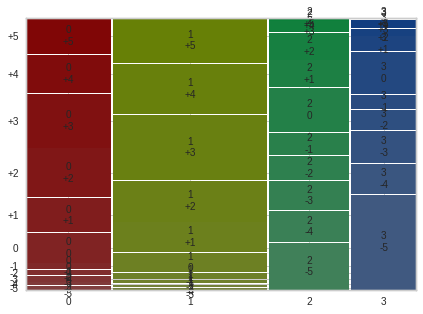

In [51]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

In [53]:
crosstab_gender =pd.crosstab(df['cluster_num'],df['Gender'].replace({1: 'Male', 0: 'Female'}))
crosstab_gender

Gender,Female,Male
cluster_num,,
0,154,169
1,349,231
2,179,125
3,106,140


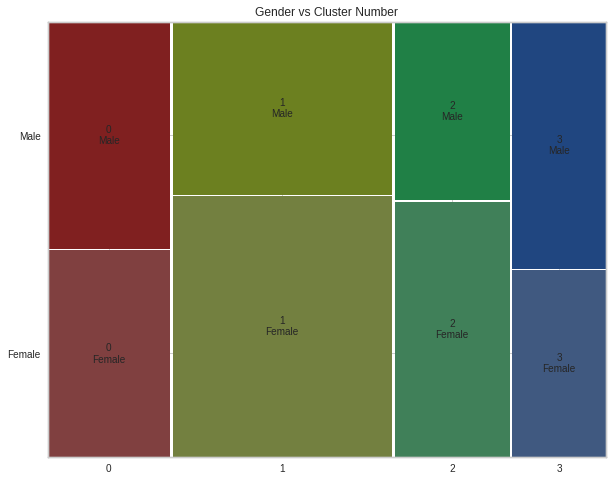

In [54]:
plt.rcParams['figure.figsize'] = (7,5)
fig, ax = plt.subplots(figsize=(10, 8))
mosaic(crosstab_gender.stack(), ax=ax, title='Gender vs Cluster Number')
plt.show()

<AxesSubplot:xlabel='cluster_num', ylabel='Age'>

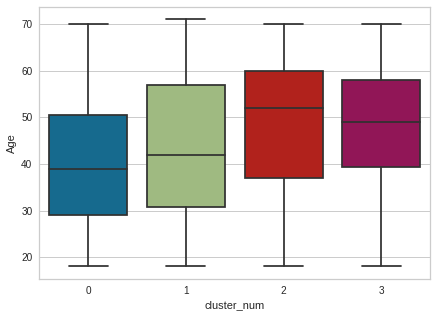

In [56]:
sns.boxplot(x="cluster_num", y="Age", data=df)

In [57]:
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [59]:
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.275542
1,1,2.962069
2,2,6.171053
3,3,7.422764


In [61]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


In [62]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender_x,Gender_y,VisitFrequency
0,0,0.523220,0.523220,2.547988
1,1,0.398276,0.398276,2.584483
2,2,0.411184,0.411184,2.822368
3,3,0.569106,0.569106,2.654472


In [63]:
scaled_df = scalar.fit_transform(df1)

pca = PCA(n_components=11)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10","PCA11"])
pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

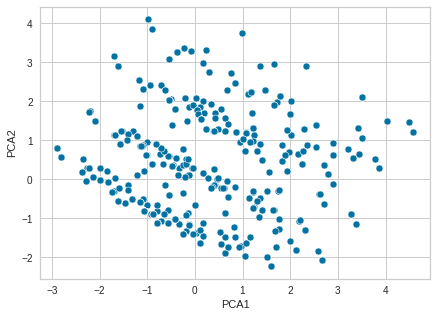

In [64]:
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", palette="deep")

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

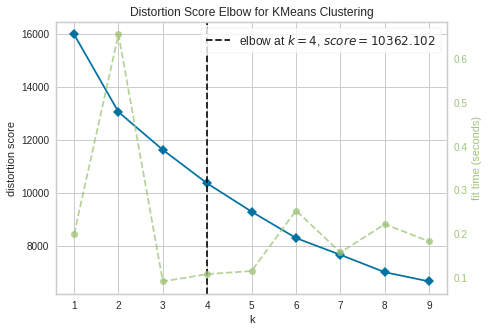

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [65]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(scaled_df)       
visualizer.show()    

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



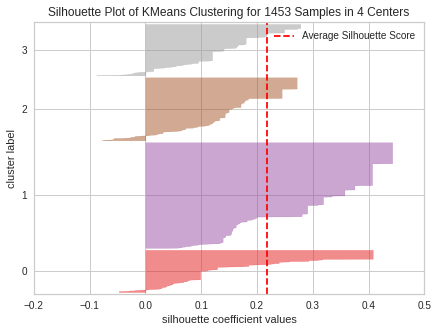

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1453 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [66]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(4)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(scaled_df)
visualizer.show()

In [67]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
pca_df_kmeans.head()

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,cluster
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170,0
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681,1
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530,1
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201,2
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144,0


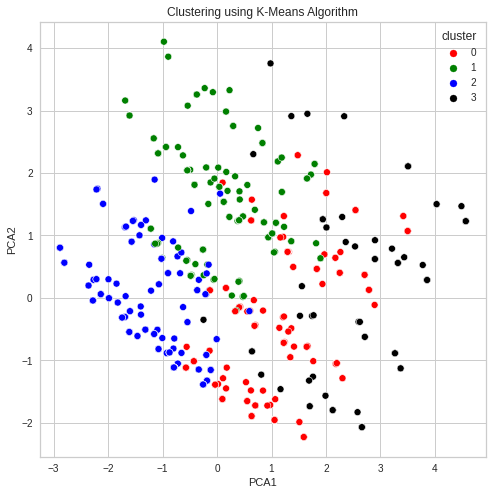

In [68]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [70]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans1= pd.concat([df1,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
pca_df_kmeans1.head()

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
0,0,1,0,1,0,1,1,0,1,0,0,2
1,1,1,0,1,1,1,1,1,1,0,0,3
2,0,1,1,1,1,1,0,1,1,1,0,3
3,1,1,0,1,1,1,1,1,0,0,1,1
4,0,1,0,1,1,1,1,0,0,1,0,1


<AxesSubplot:xlabel='cluster', ylabel='count'>

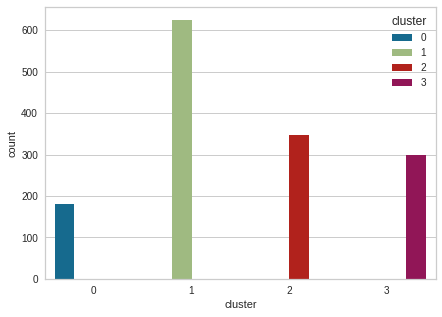

In [71]:
sns.countplot(x ='cluster', data = pca_df_kmeans1,hue = "cluster")

In [72]:
cluster_1_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==0]
cluster_1_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
17,1,1,0,0,1,1,0,1,0,0,0,0
28,0,1,0,0,0,1,0,0,0,0,0,0
31,0,1,0,0,0,1,1,1,0,1,0,0
46,0,1,0,0,0,1,0,1,0,1,0,0
54,1,1,0,0,0,1,1,1,0,1,0,0


In [73]:
cluster_2_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==1]
cluster_2_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
3,1,1,0,1,1,1,1,1,0,0,1,1
4,0,1,0,1,1,1,1,0,0,1,0,1
5,1,1,0,1,0,1,1,1,0,0,0,1
7,1,1,0,1,1,1,1,1,0,0,0,1
12,0,1,0,1,0,1,1,0,0,0,0,1


In [74]:
cluster_3_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==2]
cluster_3_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
0,0,1,0,1,0,1,1,0,1,0,0,2
8,0,0,0,1,1,0,0,0,1,0,1,2
10,0,1,0,1,0,1,1,0,0,0,1,2
14,0,1,0,1,0,1,0,0,1,0,0,2
18,0,0,0,1,1,1,1,0,1,0,1,2


In [75]:
cluster_4_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==3]
cluster_4_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
1,1,1,0,1,1,1,1,1,1,0,0,3
2,0,1,1,1,1,1,0,1,1,1,0,3
6,1,1,1,1,0,1,0,1,1,1,0,3
9,1,1,0,1,1,1,0,1,1,0,0,3
11,1,1,0,1,1,1,0,1,1,0,1,3


In [77]:
df_new= pd.concat([df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
df_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num,cluster
0,0,1,0,1,0,1,1,0,1,0,0,7,61,0,0,2,2
1,1,1,0,1,1,1,1,1,1,0,0,1,51,0,0,0,3
2,0,1,1,1,1,1,0,1,1,1,0,0,62,0,0,0,3
3,1,1,0,1,1,1,1,1,0,0,1,3,69,4,0,1,1
4,0,1,0,1,1,1,1,0,0,1,0,1,49,3,1,2,1


In [78]:
df_new['VisitFrequency'].value_counts()

3    439
0    342
5    252
4    235
2    131
1     54
Name: VisitFrequency, dtype: int64

In [79]:
df_new["VisitFrequency"]= df_new["VisitFrequency"].replace({'Never':0, 'Once a year':1, 'Every three months':2, 'Once a month':3, 'Once a week':4, 'More than once a week':5})
df_new['Like'].value_counts()

2     229
1     187
10    169
3     160
0     152
9     152
4     143
7      73
8      71
6      59
5      58
Name: Like, dtype: int64

In [80]:
df_new['Gender'].value_counts()

0    788
1    665
Name: Gender, dtype: int64

In [81]:
df_new["Like"]= df_new["Like"].replace({'I hate it!-5':0, '-4':1, '-3':2, '-2':3, '-1':4, '0':5, '+1':6, '+2':7, '+3':8, '+4':9, 'I love it!+5':10})
df_new["Gender"]= df_new["Gender"].replace({'Female':0, 'Male':1})
df_new

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num,cluster
0,0,1,0,1,0,1,1,0,1,0,0,7,61,0,0,2,2
1,1,1,0,1,1,1,1,1,1,0,0,1,51,0,0,0,3
2,0,1,1,1,1,1,0,1,1,1,0,0,62,0,0,0,3
3,1,1,0,1,1,1,1,1,0,0,1,3,69,4,0,1,1
4,0,1,0,1,1,1,1,0,0,1,0,1,49,3,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,9,47,5,1,3,2
1449,1,1,0,1,0,0,1,1,0,1,0,1,36,4,0,1,1
1450,1,1,0,1,0,1,0,1,1,0,0,2,52,3,0,0,3
1451,1,1,0,0,0,1,1,1,0,1,0,3,41,0,1,1,0


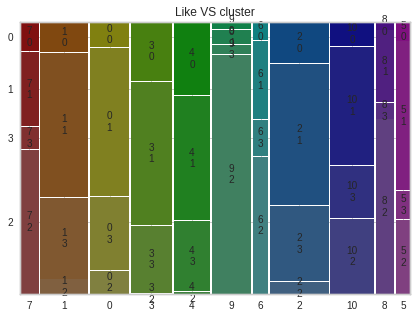

In [82]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(df_new, ['Like','cluster'],title='Like VS cluster')
plt.show()

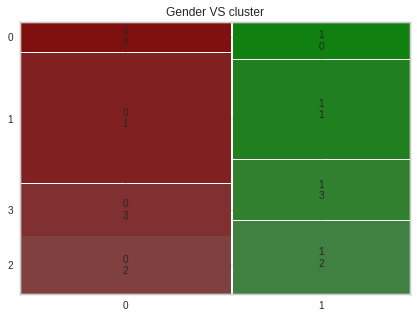

In [83]:
mosaic(df_new, ['Gender','cluster'],title='Gender VS cluster')
plt.show()

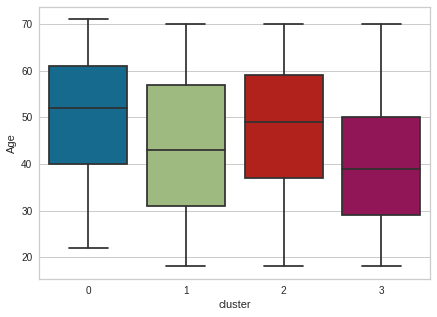

In [84]:
sns.boxplot(x=df_new['cluster'], y=df_new['Age'])
plt.show()

In [85]:
X = df_new.drop(['cluster'],axis=1)
y= df_new[['cluster']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)

In [86]:
X_test.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num
890,0,1,0,1,1,1,0,0,1,0,1,7,62,5,0,3
376,1,1,0,0,0,0,1,1,0,1,0,4,34,3,1,1
324,0,1,0,0,0,1,1,0,0,1,0,5,60,0,1,2
1220,0,1,1,1,1,1,1,1,1,0,1,9,59,2,1,3
1439,1,1,1,1,1,0,1,1,0,1,1,0,61,3,1,1


In [87]:
y_test.head(5)

,cluster
890,2
376,0
324,0
1220,2
1439,1


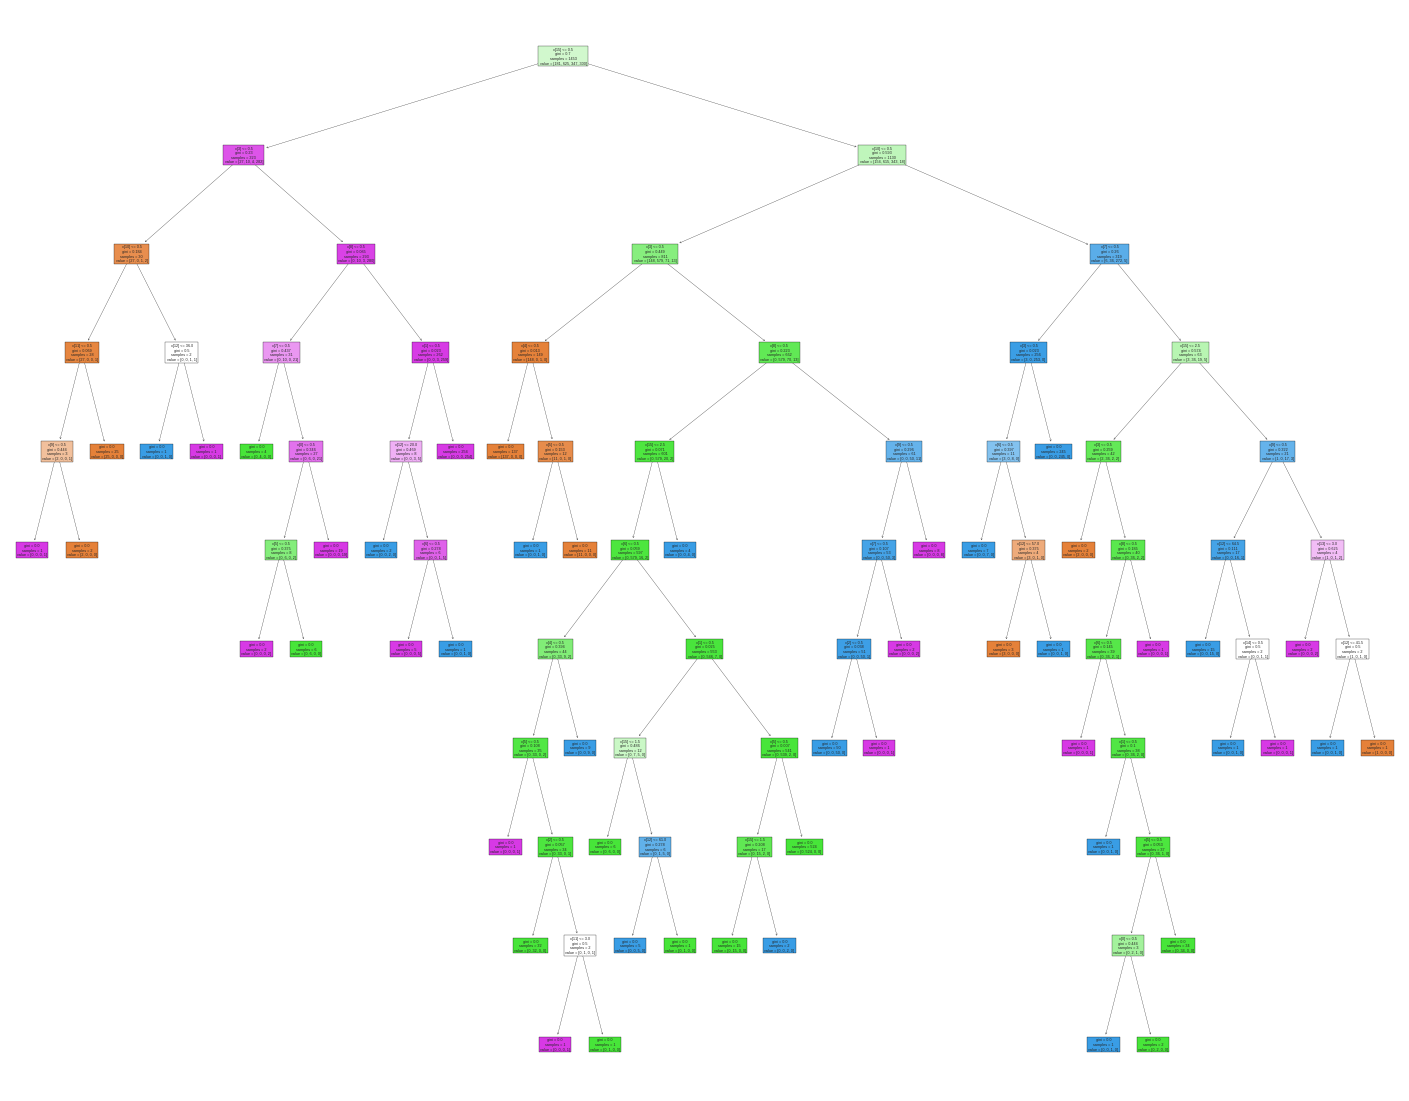

In [88]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,   filled=True)

In [89]:
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 49   0   1   0]
 [  0 189   0   5]
 [  1   3  99   0]
 [  1   0   3  85]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        50
           1       0.98      0.97      0.98       194
           2       0.96      0.96      0.96       103
           3       0.94      0.96      0.95        89

    accuracy                           0.97       436
   macro avg       0.96      0.97      0.97       436
weighted avg       0.97      0.97      0.97       436



In [90]:
import pickle
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result,'% Acuuracy')

0.9678899082568807 % Acuuracy
